# Лабораторная работа №1
Пресняцкий Виктор, гр. 956241, вариант 5

## Задача 1. Классификация с помощью однослойного персептрона

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### 1. Разобрать пример и по аналогии построить персептрон, разделяющий на два класса данные входные вектора, ввод значений входных векторов и векторов классов организовать из файла. 

In [3]:
data = np.genfromtxt('data/lab1/1.csv', delimiter=',')
data

array([[-0.5, -0.5,  0. ],
       [-0.5,  0.5,  0. ],
       [ 0.3, -0.5,  1. ],
       [-0.1,  1. ,  1. ]])

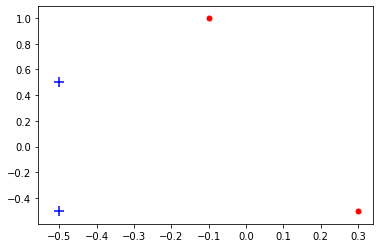

In [4]:
x1 = data[data[:, 2] == 0]
x2 = data[data[:, 2] == 1]

plt.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
plt.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=100)
plt.show()

In [5]:
X_train, y_train = data[:, :2], data[:, 2]
X_train, y_train

(array([[-0.5, -0.5],
        [-0.5,  0.5],
        [ 0.3, -0.5],
        [-0.1,  1. ]]),
 array([0., 0., 1., 1.]))

In [6]:
def g(x):
    if isinstance(x, np.ndarray):
        return (x > 0).astype(int)
    return int(x > 0)

def insert_ones(x):
    if len(x.shape) == 1:
        return np.insert(x, 0, 1)
    return np.column_stack((np.ones(x.shape[0]), x))

def init_weights(X):
    return np.random.rand(X.shape[1] + 1)

def cost_func(X, y, W):
    X_ = insert_ones(X)
    S = np.dot(W, X_.T)
    return np.mean((y - g(S)) ** 2) / 2

In [7]:
def perceptron_one_layer(X, y, learning_rate=0.1, eps=0.01, epochs=100):
    W = init_weights(X)
    
    cur_epoch = 0
    cur_error = 1

    errors_history = []
    weights_history = []

    while cur_error > eps and cur_epoch < epochs:
        print(f"Epoch - {cur_epoch + 1}")
        for i in range(X.shape[0]):
            X_i = insert_ones(X[i])
            S = np.dot(W, X_i)
            if y[i] == 1 and S <= 0:
                W = W + learning_rate * X_i
            elif y[i] == 0 and S > 0:
                W = W - learning_rate * X_i

        cur_error = cost_func(X, y, W)
        errors_history.append(cur_error)
        weights_history.append(W.copy())

        cur_epoch += 1

    return weights_history, errors_history

In [15]:
weights, errors = perceptron_one_layer(X_train, y_train)
w_res = weights[-1]

Epoch - 1
Epoch - 2
Epoch - 3
Epoch - 4
Epoch - 5
Epoch - 6


In [16]:
def plot_y_line(w, x_line):
    y_line = [-(w[0] + x * w[1]) / w[2] for x in x_line]
    return y_line

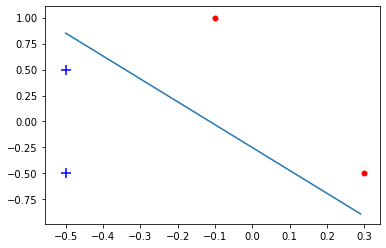

In [17]:
x_line = np.arange(-0.5, 0.3, 0.01)

plt.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
plt.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=100)
plt.plot(x_line, plot_y_line(w_res, x_line))  
plt.show()

In [18]:
def plot_errors(err):
    plt.plot(range(1, len(err) + 1), err, color='blue')
    plt.ylabel("error")
    plt.xlabel("epoch")
    plt.show()

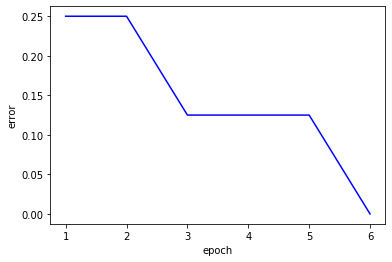

In [19]:
plot_errors(errors)

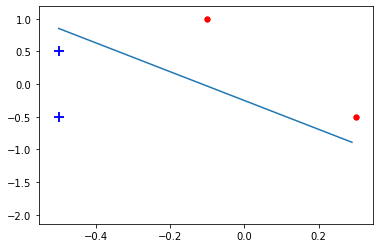

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
x = np.arange(-0.5, 0.3, 0.01)
line, = ax.plot(x, plot_y_line(weights[0], x))


def init():
    ax.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
    ax.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=100)
    return line,

def update(i):
    line.set_ydata(plot_y_line(weights[i], x))  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, update, interval=300, frames=len(errors), init_func=init, blit=True)

HTML(ani.to_jshtml())

### 2. На данных входных векторах продемонстрировать проблему исключающего ИЛИ для персептрона - невозможность линейного разбиения входных векторов на заданные классы.

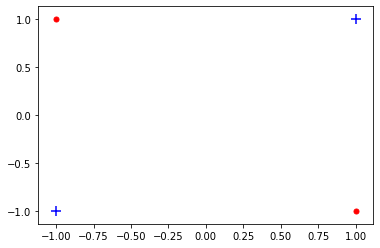

In [21]:
data_issue = np.genfromtxt('data/lab1/2.csv', delimiter=',')

x1 = data_issue[data_issue[:, 2] == 0]
x2 = data_issue[data_issue[:, 2] == 1]

plt.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
plt.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=100)
plt.show()

In [22]:
X_train, y_train = data_issue[:, :2], data_issue[:, 2]
X_train, y_train

(array([[-1., -1.],
        [-1.,  1.],
        [ 1.,  1.],
        [ 1., -1.]]),
 array([0., 1., 0., 1.]))

In [30]:
weights, errors = perceptron_one_layer(X_train, y_train)

Epoch - 1
Epoch - 2
Epoch - 3
Epoch - 4
Epoch - 5
Epoch - 6
Epoch - 7
Epoch - 8
Epoch - 9
Epoch - 10
Epoch - 11
Epoch - 12
Epoch - 13
Epoch - 14
Epoch - 15
Epoch - 16
Epoch - 17
Epoch - 18
Epoch - 19
Epoch - 20
Epoch - 21
Epoch - 22
Epoch - 23
Epoch - 24
Epoch - 25
Epoch - 26
Epoch - 27
Epoch - 28
Epoch - 29
Epoch - 30
Epoch - 31
Epoch - 32
Epoch - 33
Epoch - 34
Epoch - 35
Epoch - 36
Epoch - 37
Epoch - 38
Epoch - 39
Epoch - 40
Epoch - 41
Epoch - 42
Epoch - 43
Epoch - 44
Epoch - 45
Epoch - 46
Epoch - 47
Epoch - 48
Epoch - 49
Epoch - 50
Epoch - 51
Epoch - 52
Epoch - 53
Epoch - 54
Epoch - 55
Epoch - 56
Epoch - 57
Epoch - 58
Epoch - 59
Epoch - 60
Epoch - 61
Epoch - 62
Epoch - 63
Epoch - 64
Epoch - 65
Epoch - 66
Epoch - 67
Epoch - 68
Epoch - 69
Epoch - 70
Epoch - 71
Epoch - 72
Epoch - 73
Epoch - 74
Epoch - 75
Epoch - 76
Epoch - 77
Epoch - 78
Epoch - 79
Epoch - 80
Epoch - 81
Epoch - 82
Epoch - 83
Epoch - 84
Epoch - 85
Epoch - 86
Epoch - 87
Epoch - 88
Epoch - 89
Epoch - 90
Epoch - 91
Epoch - 

Видим, что ошибка не достигла минимума и алгоритм зациклился. Отсюда следует невозможность линейного разбиения входных векторов на заданные классы.

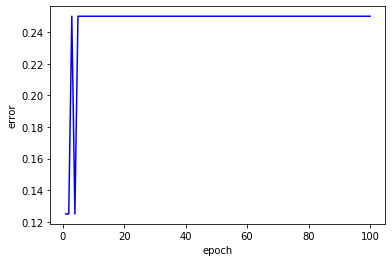

In [31]:
plot_errors(errors)

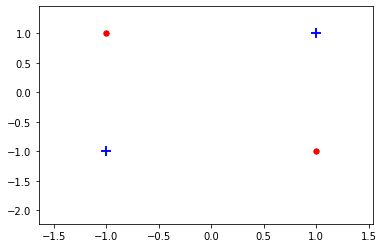

In [32]:
fig, ax = plt.subplots()
x = np.arange(-1.5, 1.5, 0.1)
line, = ax.plot(x, plot_y_line(weights[0], x))


def init():
    ax.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
    ax.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=100)
    return line,

def update(i):
    line.set_ydata(plot_y_line(weights[i], x))
    return line,

ani = animation.FuncAnimation(
    fig, update, interval=50, frames=len(errors), init_func=init, blit=True)

HTML(ani.to_jshtml())

### 3. Построить персептрон из двух нейронов, разбивающий входные вектора на 4 класса.

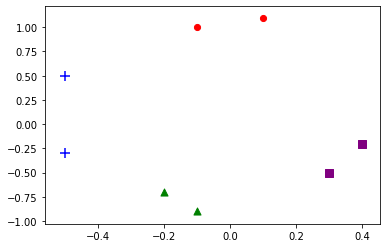

In [33]:
data_two_perc = np.genfromtxt('data/lab1/3.csv', delimiter=',')

x1 = data_two_perc[data_two_perc[:, 2] == 0]
x2 = data_two_perc[data_two_perc[:, 2] == 1]
x3 = data_two_perc[data_two_perc[:, 2] == 2]
x4 = data_two_perc[data_two_perc[:, 2] == 3]

plt.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
plt.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=150)
plt.scatter(x3[:, 0], x3[:, 1], color='green', marker='^', s=50)
plt.scatter(x4[:, 0], x4[:, 1], color='purple', marker='s', s=50)
plt.show()

Разбиваем 4 класса на две пары классов. Каждый нейрон будет отвечать за одну пару классов.

In [34]:
X_train, y_train = data_two_perc[:, :2], data_two_perc[:, 2]
y_1 = y_train // 2
y_2 = y_train % 2
X_train, y_1, y_2

(array([[-0.5, -0.3],
        [-0.5,  0.5],
        [ 0.3, -0.5],
        [ 0.4, -0.2],
        [-0.2, -0.7],
        [-0.1, -0.9],
        [-0.1,  1. ],
        [ 0.1,  1.1]]),
 array([0., 0., 1., 1., 1., 1., 0., 0.]),
 array([0., 0., 1., 1., 0., 0., 1., 1.]))

In [61]:
weights_1, errors_1 = perceptron_one_layer(X_train, y_1)
weights_2, errors_2 = perceptron_one_layer(X_train, y_2)
w1_res = weights_1[-1]
w2_res = weights_2[-1]

Epoch - 1
Epoch - 2
Epoch - 3
Epoch - 1
Epoch - 2
Epoch - 3
Epoch - 4


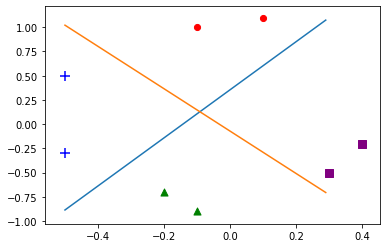

In [62]:
x_line = np.arange(-0.5, 0.3, 0.01)

plt.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
plt.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=150)
plt.scatter(x3[:, 0], x3[:, 1], color='green', marker='^', s=50)
plt.scatter(x4[:, 0], x4[:, 1], color='purple', marker='s', s=50)
plt.plot(x_line, plot_y_line(w1_res, x_line))
plt.plot(x_line, plot_y_line(w2_res, x_line))
plt.show()

Считаем общую ошибку персептрона из двух нейронов.

In [63]:
max_len = max(len(errors_1), len(errors_2))
err1, err2 = np.array(errors_1), np.array(errors_2)
err1.resize(max_len)
err2.resize(max_len)
common_errors = np.add(err1, err2)

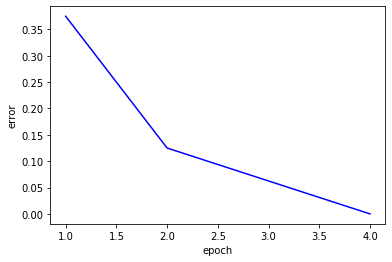

In [64]:
plot_errors(common_errors)

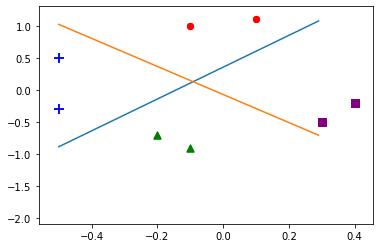

In [68]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()
x = np.arange(-0.5, 0.3, 0.01)
line1, = ax.plot(x, plot_y_line(weights_1[0], x))
line2, = ax.plot(x, plot_y_line(weights_2[0], x))
animation_length = len(common_errors)
weights_1 = np.pad(weights_1, (0, animation_length - len(weights_1)), mode='edge')
weights_2 = np.pad(weights_2, (0, animation_length - len(weights_2)), mode='edge')

def init():
    ax.scatter(x1[:, 0], x1[:, 1], color='blue', marker='+', s=100)
    ax.scatter(x2[:, 0], x2[:, 1], color='red', marker='.', s=150)
    ax.scatter(x3[:, 0], x3[:, 1], color='green', marker='^', s=50)
    ax.scatter(x4[:, 0], x4[:, 1], color='purple', marker='s', s=50)
    return line1, line2

def update(i):
    line1.set_ydata(plot_y_line(weights_1[i], x))
    line2.set_ydata(plot_y_line(weights_2[i], x))
    return line1, line2

ani = animation.FuncAnimation(
    fig, update, interval=400, frames=len(common_errors), init_func=init, blit=True)

HTML(ani.to_jshtml())

## Задача 2. Многослойный персептрон

### Построить многослойную нейронную сеть, реализующую отделение на плоскости точек, принадлежащих заданной невыпуклой фигуре, от остальных.

Находим уравнения прямых, содержащих грани многоугольника, и строим фигуру:

In [69]:
equations = [
    [-2, 1, 0],
    [17, 2, -3],
    [14, -1, -1],
    [0, 1, -1],
    [25, -1, -4],
    [-11, 3, -4],
    [13, -2, -3],
    [35, -3, -2],
]

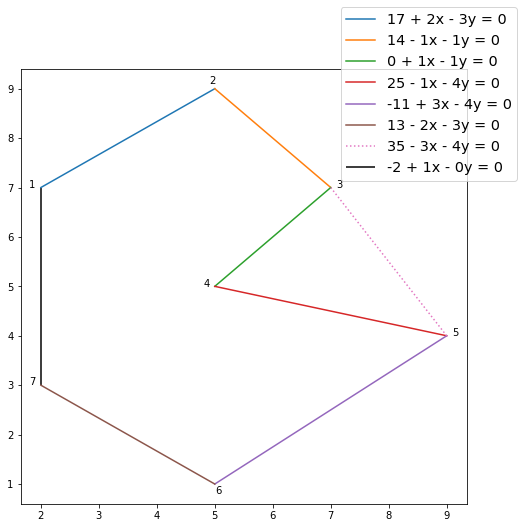

In [78]:
def plot_figure(eq, no_extra_line=False):
    all_lines = [
        np.arange(2, 5.1, 0.1),
        np.arange(5, 7.1, 0.1),
        np.arange(5, 7.1, 0.1),
        np.arange(5, 9.1, 0.1),
        np.arange(5, 9.1, 0.1),
        np.arange(2, 5.1, 0.1),
        np.arange(7, 9.1, 0.1),
    ]
    labels = [
        '-2 + 1x - 0y = 0',
        '17 + 2x - 3y = 0',
        '14 - 1x - 1y = 0',
        '0 + 1x - 1y = 0',
        '25 - 1x - 4y = 0',
        '-11 + 3x - 4y = 0',
        '13 - 2x - 3y = 0',
        '35 - 3x - 4y = 0',
    ]

    fig = plt.figure(figsize=(8,8))
    plt.vlines(x=-eq[0][0], ymin=3, ymax=7, color='k', label=labels[0])
    for i in range(1, len(eq) - 1):  # 8th line is not drawn
        plt.plot(all_lines[i - 1], plot_y_line(eq[i], all_lines[i - 1]), label=labels[i])
    if not no_extra_line:
        plt.plot(all_lines[-1], plot_y_line(eq[-1], all_lines[-1]), label=labels[-1], linestyle=':')

    plt.text(1.8, 7, '1')
    plt.text(4.9, 9.1, '2')
    plt.text(7.1, 7, '3')
    plt.text(4.8, 5, '4')
    plt.text(9.1, 4, '5')
    plt.text(5, 0.8, '6')
    plt.text(1.8, 3, '7')
    return fig

fig = plot_figure(equations)
fig.legend(fontsize='x-large')
plt.show()

Постром дополнительную линию, которая превращает невыпуклый многоугольник в выпуклый.

На первом слое сети нейроны говорят о том, с какой стороны от прямой находится точка X.

Подбираем веса и смещения на втором и третьем слоях следующим образом:
- на втором слое 2 нейрона: первый нейрон говорит о том, находится ли точка в фигуре 1-2-3-5-6-7, второй - в фигуре 3-4-5;
- на третьем слое 1 нейрон, который принимает значение 1, если точка X принадлежит первой фигуре и не принадлежит второй.

In [79]:
# equations = [
#     [-2, 1, 0],
#     [17, 2, -3],
#     [14, -1, -1],
#     [0, 1, -1],
#     [25, -1, -4],
#     [-11, 3, -4],
#     [13, -2, -3],
#     [35, -3, -2],
# ]

W = np.array([
    np.array(equations),
    np.array([
        [-3, 1, 1, 1, 0, 0, -1, -1, 1],
        [-1, 0, 0, 0, 1, -1, 0, 0, 1],
    ]),
    np.array(
        [0, 1, -1],
    ),
])

In [80]:
def perceptron_multi_layer(x):
    z1 = np.dot(W[0], insert_ones(x))
    a1 = g(z1)

    z2 = np.dot(W[1], insert_ones(a1))
    a2 = g(z2)

    z3 = np.dot(W[2], insert_ones(a2))
    output_layer = g(z3)

    return output_layer

In [83]:
positive = []
negative = []
for i in range(100):
    x = np.random.uniform(0, 10, 2)
    is_in_figure = perceptron_multi_layer(x)
    positive.append(x) if is_in_figure else negative.append(x)

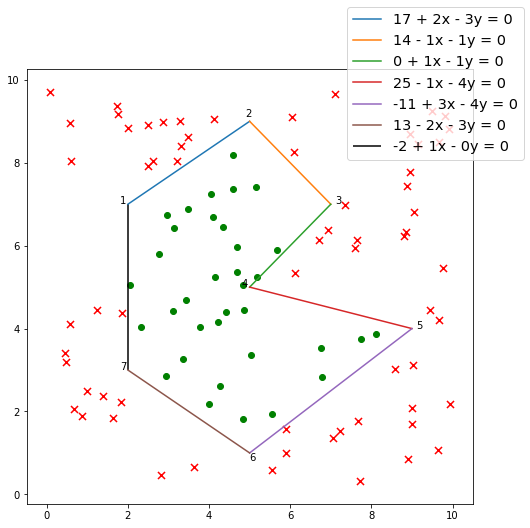

In [84]:
fig = plot_figure(equations, no_extra_line=True)
plt.scatter([x[0] for x in positive], [x[1] for x in positive], color='green')
plt.scatter([x[0] for x in negative], [x[1] for x in negative], color='red',  marker='x', s=50)
fig.legend(fontsize='x-large')
plt.show()